In [1]:
%reset
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from functions import loader, splt, fitter, stats, grouper
import matplotlib.pyplot as plt
from uncertainties import *

savedir = "E01/"

In [4]:
all_data = loader.load_data( "../CloudVenetoAnalysisBis/20220601ForUngaussianityscan_20220602/**/" )
data = loader.remove_duplicates( all_data,
    lambda d: ( d['dep_polymers'], d['side'], d['defects_frac'], d['gamma'] ),
    lambda d: d['runned_replicas']
)
len( data )

161

In [5]:
def compute_in_decades( thearray, func ):
    tot_len = len( thearray )
    cluster_len = int( tot_len / 10 )
    results = []
    for i in range( 10 ):
        results.append( func( thearray[ cluster_len * i : cluster_len * ( i + 1 ) ] ) )
    u = ufloat( func( thearray ), np.std( results ) )
    print( u )
    return u

In [6]:
for d in data:
    d['pj_over_1_minus_q_u'] = compute_in_decades( d['chunks'], lambda d: np.mean( d ) ) / d['side'] / d['side'] / ( 1 - d['defects_frac'] )
    d['pj_u'] = compute_in_decades( d['chunks'], lambda d: np.mean( d ) ) / d['side'] / d['side']

3291.03+/-0.14
3291.03+/-0.14
3110.89+/-0.23
3110.89+/-0.23
2438.4+/-1.4
2438.4+/-1.4
49688.6+/-0.5
49688.6+/-0.5
46859.9+/-3.2
46859.9+/-3.2
44949.9+/-3.1
44949.9+/-3.1
42145.8+/-1.0
42145.8+/-1.0
43821+/-4
43821+/-4
41116+/-6
41116+/-6
39048.2+/-0.8
39048.2+/-0.8
35926.5+/-1.4
35926.5+/-1.4
52614.4+/-0.4
52614.4+/-0.4
49725.3+/-1.3
49725.3+/-1.3
2237.3+/-0.6
2237.3+/-0.6
47852.3+/-1.4
47852.3+/-1.4
45193.9+/-2.0
45193.9+/-2.0
49620.4+/-1.5
49620.4+/-1.5
46768.9+/-0.5
46768.9+/-0.5
44696.3+/-1.1
44696.3+/-1.1
41642.1+/-1.3
41642.1+/-1.3
43668.9+/-0.9
43668.9+/-0.9
40908+/-4
40908+/-4
38561.7+/-1.0
38561.7+/-1.0
35003+/-7
35003+/-7
3289.18+/-0.26
3289.18+/-0.26
52595.8+/-0.6
52595.8+/-0.6
49704.8+/-2.6
49704.8+/-2.6
47760.9+/-0.8
47760.9+/-0.8
45025.7+/-0.5
45025.7+/-0.5
49578.7+/-1.5
49578.7+/-1.5
46718.2+/-0.7
46718.2+/-0.7
44519+/-4
44519+/-4
41302.5+/-1.9
41302.5+/-1.9
43570.7+/-1.0
43570.7+/-1.0
40779.60+/-0.16
40779.60+/-0.16
3108.60+/-0.16
3108.60+/-0.16
38212.8+/-1.4
38212.8+/-

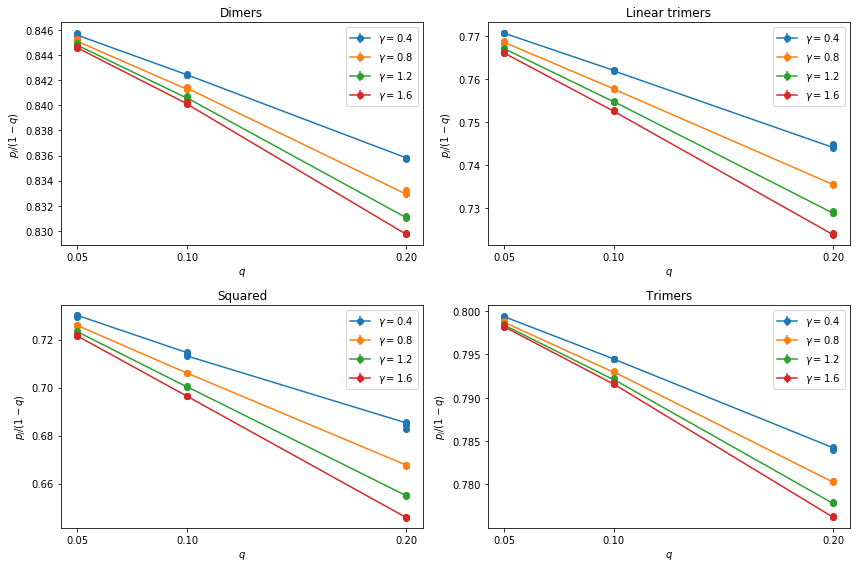

In [7]:
filtered_data = data

splt.oneitem_iterate_errorbar(
    len( filtered_data ),
    lambda d: filtered_data[d]['dep_polymers'],
    lambda d: filtered_data[d]['gamma'],
    lambda d: filtered_data[d]['defects_frac'],
    lambda d: [
        filtered_data[d]['pj_over_1_minus_q_u'],
    ],
    lambda it, l: [
        { 'label': fr"$\gamma = {l:.1f}$", 'ls': '-', 'marker': 'o' }
    ],
    lambda it: (
        plt.title( fr"{it}" ),
        # plt.xscale( 'log', basex = 2 ),
        # plt.yscale( 'log', basey = 10 ),
        plt.xlabel( fr"$q$" ),
        # splt.hline( 0 ),
        plt.ylabel( fr"$p_j / ( 1 - q )$" )
    )
)

plt.tight_layout()
plt.savefig( savedir + "jamming_normalized_witherrors.pdf" )
plt.savefig( savedir + "jamming_normalized_witherrors.png" )